<a href="https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/subgraphMining/basic/gspan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding frequent subgraphs in graph databases using gSpan

This tutorial has two parts.
In the first part, we describe the basic approach to find frequent patterns in

1.   Basic approach to find frequent subgraphs at a single minimum support value
2.   Advanced approach to find frequent subgraphs at different minimum support values

# Prerequisites:


### Step 1: Download the latest version of PAMI repository

In [1]:
!pip install -U pami

### Step 2: Download the sample graph database from the SPMF library

In [2]:
!wget https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt

--2024-03-09 08:02:50--  https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt
Resolving www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)... 172.67.193.154, 104.21.33.228, 2606:4700:3035::ac43:c19a, ...
Connecting to www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)|172.67.193.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169680 (166K) [text/plain]
Saving to: ‘Chemical_340.txt.1’

Chemical_340.txt.1  100%[===================>] 165.70K  --.-KB/s    in 0.1s    

2024-03-09 08:02:51 (1.24 MB/s) - ‘Chemical_340.txt.1’ saved [169680/169680]



### Step 3: Printing a few lines of the graph database

In [3]:
!head -30 Chemical_340.txt

t # 0
v 0 0
v 1 0
v 2 0
v 3 0
v 4 0
v 5 0
v 6 1
v 7 1
v 8 1
v 9 1
v 10 2
v 11 0
v 12 0
v 13 2
v 14 0
v 15 0
v 16 0
v 17 0
v 18 1
v 19 1
v 20 1
v 21 3
v 22 3
v 23 4
v 24 5
v 25 5
e 0 1 3
e 1 2 3
e 2 3 3


***

# Basic approach: Discovering frequent subgraphs using a single minimum support

### Step 1: Understanding the statistics of the graph database

### Step 2: Drawing the frequency graphs

### Step 3: Choosing an appropriate minimum support

In [ ]:
minSup = 0.2

### Step 4: Frequent subgraph discovery using gspan

In [6]:
from PAMI.subgraphMining.basic import gspan as alg

obj = alg.GSpan('Chemical_340.txt', 0.2, True, 100, True)

obj.startMine()

frequentGraphs = obj.getFrequentSubgraphs()


memUSS = obj.getMemoryUSS()
print("Total Memory in USS:", memUSS)

memRSS = obj.getMemoryRSS()
print("Total Memory in RSS", memRSS)

run = obj.getRuntime()
print("Total ExecutionTime in seconds:", run)


obj.save('frequentSupgraphs.txt')

Total Memory in USS: 138113024
Total Memory in RSS 159993856
Total ExecutionTime in seconds: 125.31419539451599


### Step 5: Investigate the generated subgraphs

In [ ]:
head -10 frequentSupgraphs.txt

***

# Advanced approach: Discovering frequent subgraphs by varying minimum support values

### Step 1: Import the libraries and specify the input parameters

In [3]:
#Import the libraries
from PAMI.subgraphMining.basic import gspan as alg
from PAMI.extras.messaging import gmail as msg

import pandas as pd

#Specify the input parameters
inputFile = 'Chemical_340.txt'
seperator='\t'
minimumSupportList = [0.1,0.2,0.3,0.4,0.5]

#Specify the inpur parameters for gmail
fromAddress = 'uday.rage@gmail.com'
passwd ='ybdb nvld iqpw vrgl'

### Step 2: Create a data frame to store the results of gspan

In [4]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

### Step 3: Execute the algorithm at different minSup values

In [5]:
message = msg.gmail(userName=fromAddress, password=passwd)

for minSup in minimumSupportList:
    obj = alg.GSpan('Chemical_340.txt', minSup, True, 100, True)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['gspan', minSup, len(obj.getFrequentSubgraphs()), obj.getRuntime(), obj.getMemoryRSS()]

message.send(toAddress='uday.rage@gmail.com', subject='Gspan', body='Mining process completed')

### Step 4: Print the Result

In [7]:
result

algorithm  minSup  patterns     runtime     memory
0     gspan     0.1   4458575  548.490271  334077952
1     gspan     0.2    527474  117.170663  335929344
2     gspan     0.3    139877   56.687027  335929344
3     gspan     0.4    137875   53.190486  335929344
4     gspan     0.5     30441   17.164928  335929344

### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

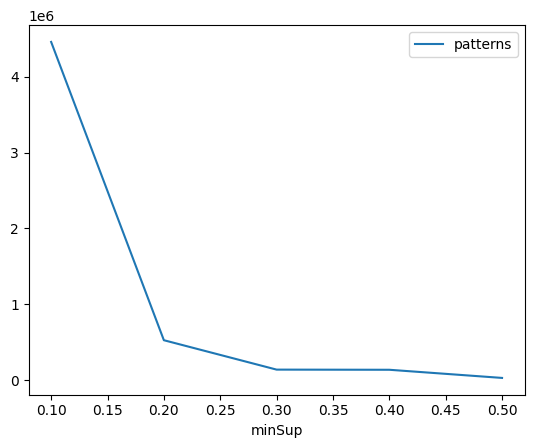

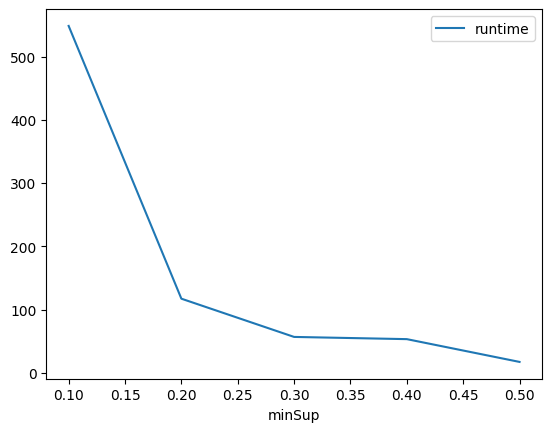

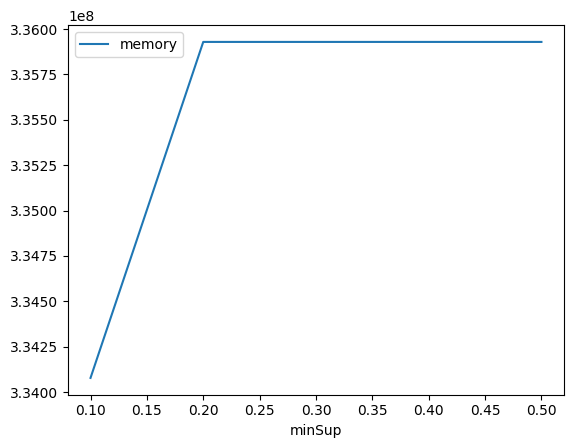

In [8]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

In [17]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_subgraphs(path):
    with open(path, 'r') as file:
        lines = file.readlines()

    current_graph = None
    graphs = []
    vertex_labels = {}
    edge_labels = {}

    for line in lines:
        if line.startswith('t #'):
            if current_graph is not None:
                graphs.append((current_graph, vertex_labels, edge_labels))
            current_graph = nx.Graph()
            vertex_labels = {}
            edge_labels = {}
        elif line.startswith('v'):
            _, vertex_id, label = line.split()
            current_graph.add_node(int(vertex_id))
            vertex_labels[int(vertex_id)] = label
        elif line.startswith('e'):
            _, source, target, label = line.split()
            current_graph.add_edge(int(source), int(target))
            edge_labels[(int(source), int(target))] = label

    if current_graph is not None:
        graphs.append((current_graph, vertex_labels, edge_labels))

    n_rows = int(len(graphs) ** 0.5)
    n_cols = (len(graphs) // n_rows) + (len(graphs) % n_rows > 0)

    plt.figure(figsize=(n_cols * 4, n_rows * 4))

    for i, (graph, vertex_labels, edge_labels) in enumerate(graphs):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, labels=vertex_labels, ax=ax, with_labels=True, node_color='lightblue',
                node_size=500, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='black')
        ax.set_title(f"Frequent Subgraph {i + 1}")

    plt.tight_layout()
    plt.show()

In [11]:
def parse_graph_file(path):
    graphs = []
    current_graph = {'vertices': [], 'edges': []}

    with open(path, 'r') as file:
        for line in file:
            if line.startswith('t #'):
                if current_graph['vertices'] or current_graph['edges']:
                    graphs.append(current_graph)
                    current_graph = {'vertices': [], 'edges': []}
            elif line.startswith('v'):
                _, v_id, label = line.split()
                current_graph['vertices'].append((int(v_id), int(label)))
            elif line.startswith('e'):
                _, v1, v2, label = line.split()
                current_graph['edges'].append((int(v1), int(v2), int(label)))

    if current_graph['vertices'] or current_graph['edges']:
        graphs.append(current_graph)

    return graphs

In [12]:
def print_statistics(graphs):
    for i, graph in enumerate(graphs):
        print(f"Graph {i}:")
        num_vertices = len(graph['vertices'])
        num_edges = len(graph['edges'])
        vertex_labels = set(label for _, label in graph['vertices'])
        edge_labels = set(label for _, _, label in graph['edges'])

        print(f"  Number of vertices: {num_vertices}")
        print(f"  Number of edges: {num_edges}")
        print(f"  Unique vertex labels: {vertex_labels}")
        print(f"  Unique edge labels: {edge_labels}")
        print()

In [13]:
file_path = 'Chemical_340.txt'
graphs = parse_graph_file(file_path)
print_statistics(graphs)

Graph 0:
  Number of vertices: 26
  Number of edges: 28
  Unique vertex labels: {0, 1, 2, 3, 4, 5}
  Unique edge labels: {0, 1, 3}

Graph 1:
  Number of vertices: 16
  Number of edges: 16
  Unique vertex labels: {0, 1, 3, 4, 5, 6}
  Unique edge labels: {0, 1, 3}

Graph 2:
  Number of vertices: 26
  Number of edges: 27
  Unique vertex labels: {0, 1, 8, 7}
  Unique edge labels: {0, 1, 3}

Graph 3:
  Number of vertices: 22
  Number of edges: 24
  Unique vertex labels: {8, 9, 1, 7}
  Unique edge labels: {0, 1}

Graph 4:
  Number of vertices: 8
  Number of edges: 7
  Unique vertex labels: {8, 9, 1}
  Unique edge labels: {0}

Graph 5:
  Number of vertices: 8
  Number of edges: 7
  Unique vertex labels: {8, 9, 1}
  Unique edge labels: {0}

Graph 6:
  Number of vertices: 8
  Number of edges: 7
  Unique vertex labels: {8, 9, 1}
  Unique edge labels: {0}

Graph 7:
  Number of vertices: 6
  Number of edges: 5
  Unique vertex labels: {8, 1, 7}
  Unique edge labels: {0, 1}

Graph 8:
  Number of ver

In [18]:
visualize_subgraphs(file_path)